Inspired by https://github.com/lingjzhu/CharsiuG2P. 

* Baseline (just a small byt5): 0.387 reduction

In [24]:
from transformers import T5ForConditionalGeneration, AutoTokenizer

In [25]:
model = T5ForConditionalGeneration.from_pretrained('charsiu/g2p_multilingual_byT5_tiny_8_layers_100')
tokenizer = AutoTokenizer.from_pretrained('google/byt5-small')

In [26]:
# tokenized English words
words = ['Char', 'siu', 'is', 'a', 'Cantonese', 'style', 'of', 'barbecued', 'pork']
words = ['<eng-us>: '+i for i in words]

out = tokenizer(words,padding=True,add_special_tokens=False,return_tensors='pt')

preds = model.generate(**out,num_beams=1) # We do not find beam search helpful. Greedy decoding is enough. 
phones = tokenizer.batch_decode(preds.tolist(),skip_special_tokens=True)
print(phones)

['ˈtʃɑɹ', 'ˈsiu', 'ˈɪs', 'ˈɑ', 'ˈkæntoʊˌniz', 'ˈstaɪɫ', 'ˈɔf', 'ˈbɑɹbɪkjud', 'ˈpɔɹk']


c:\users\david\appdata\local\programs\python\python39\lib\site-packages\transformers\generation_utils.py:1227: UserWarning: Neither `max_length` nor `max_new_tokens` has been set, `max_length` will default to 20 (`self.config.max_length`). Controlling `max_length` via the config is deprecated and `max_length` will be removed from the config in v5 of Transformers -- we recommend using `max_new_tokens` to control the maximum length of the generation.
  warnings.warn(


In [27]:
%%time


words = 'Господа, я не ел шесть дней целых 6 дней'.split()
words = ['<rus>: '+i for i in words]

out = tokenizer(words, padding=True, add_special_tokens=False, return_tensors='pt')

preds = model.generate(**out,num_beams=1) # We do not find beam search helpful. Greedy decoding is enough. 
phones = tokenizer.batch_decode(preds.tolist(),skip_special_tokens=True)
print(phones)

['ɡəspɐdak', 'ja', 'nʲe', 'jeɫ', 'ʂɛsʲtʲ', 'dʲnʲej', 't͡sɛɫɨx', 'tsʰɪŋ˧˥', 'dʲnʲej']
Wall time: 125 ms


In [28]:
tokenizer.convert_ids_to_tokens(tokenizer('привет').input_ids)

['Ð', '¿', 'Ñ', '\x80', 'Ð', '¸', 'Ð', '²', 'Ð', 'µ', 'Ñ', '\x82', '</s>']

# Loading the training data

## The original sentences

In [31]:
import pandas as pd

In [32]:
df_orig = pd.read_csv('../data/spellchecker_dataset_split.tsv', sep='\t')
df_orig

,trash,clean,trash2,clean2,distance,normalized_distance,split,edit_max_cldiff,edit_max_lendiff
0,"Шунда ук әсәйемдең тоҡсайын, төйөнсөктәрен күҙ...","Шунда уҡ әсәйемдең тоҡсайын, төйөнсөктәрен күҙ...","Шунда ук әсәйемдең тоҡсайын, төйөнсөктәрен күҙ...","Шунда уҡ әсәйемдең тоҡсайын, төйөнсөктәрен күҙ...",1,0.015385,train,1,0
1,Унан беҙ өсөбөҙ ҙә ултырғыстарға ултырабыҙ.,Унан беҙ әсәбеҙ ҙә ултырғыстарға ултырабыҙ.,Унан беҙ өсөбөҙ ҙә ултырғыстарға ултырабыҙ.,Унан беҙ әсәбеҙ ҙә ултырғыстарға ултырабыҙ.,3,0.069767,test,1,0
2,"«Иҫән-Һау ғына тороғоҙ инде», - тип бышылдай у...","«Иҫән-һау ғына тороғоҙ инде», - тип бышылдай у...","«Иҫән-Һау ғына тороғоҙ инде», - тип бышылдай у...","«Иҫән-һау ғына тороғоҙ инде», - тип бышылдай у...",1,0.014085,dev,1,0
3,"Минең генә бер кешем дә юҡ, тип шунда уҡ танау...","Минең генә бер кешем дә юҡ, - тип шунда уҡ тан...","Минең генә бер кешем дә юҡ, тип шунда уҡ танау...","Минең генә бер кешем дә юҡ, - тип шунда уҡ тан...",2,0.029412,train,0,0
4,"Ай йөрөгән, ти, йыл йөрөгән, ти, батыр, ете та...","Ай йөрөгән, ти, йыл йөрөгән, ти, батыр, ете та...","Ай йөрөгән, ти, йыл йөрөгән, ти, батыр, ете та...","Ай йөрөгән, ти, йыл йөрөгән, ти, батыр, ете та...",1,0.012500,train,1,0
...,...,...,...,...,...,...,...,...,...
23886,"Эҫтәрендә бүре үк оломаһа ла, эттәр шыңшый баш...","Эстәрендә бүре үк оломаһа ла, эттәр шыңшый баш...","Эҫтәрендә бүре үк оломаһа ла, эттәр шыңшый баш...","Эстәрендә бүре үк оломаһа ла, эттәр шыңшый баш...",1,0.020000,dev,1,0
23887,Үткән йәйҙә яман томра көндө Кәҙерғол төбәгенд...,Үткән йәйҙә яман томра көндө Ҡәҙерғол төбәгенд...,Үткән йәйҙә яман томра көндө Кәҙерғол төбәгенд...,Үткән йәйҙә яман томра көндө Ҡәҙерғол төбәгенд...,1,0.009524,train,1,0
23888,"Кайтыр алдынан салбарҙы эҙләй башлаһа, таба ал...","Ҡайтыр алдынан салбарҙы эҙләй башлаһа, таба ал...","Кайтыр алдынан салбарҙы эҙләй башлаһа, таба ал...","Ҡайтыр алдынан салбарҙы эҙләй башлаһа, таба ал...",1,0.020000,train,1,0
23889,Кыш урталарында бер көн Әбдрәшит ат аҙбарынан ...,Ҡыш урталарында бер көн Әбдрәшит ат аҙбарынан ...,Кыш урталарында бер көн Әбдрәшит ат аҙбарынан ...,Ҡыш урталарында бер көн Әбдрәшит ат аҙбарынан ...,1,0.009174,train,1,0


In [33]:
df_orig_train = df_orig[(df_orig.split=='train')]
print(df_orig_train.shape)

df_orig_train = df_orig_train[df_orig_train.edit_max_cldiff <= 3]
print(df_orig_train.shape)
df_orig_train = df_orig_train[df_orig_train.edit_max_lendiff <= 1].copy()
print(df_orig_train.shape)

(14382, 9)
(14171, 9)
(14085, 9)


In [67]:
df_orig_dev = df_orig[(df_orig.split=='dev') & (df_orig.edit_max_cldiff <= 3) & (df_orig.edit_max_lendiff <= 1)]
print(df_orig_dev.shape)

(4611, 9)


In [255]:
old_lens = pd.Series([len(s) for s in tokenizer(df_orig_train.trash2.tolist())['input_ids']])
new_lens = pd.Series([len(s) for s in tokenizer(df_orig_train.clean2.tolist())['input_ids']])

In [256]:
from sklearn.linear_model import QuantileRegressor

In [264]:
n = 1000
qr = QuantileRegressor(quantile=0.99).fit(old_lens.head(n).to_frame(), new_lens.head(n))
print(qr.coef_[0], qr.intercept_)
qr = QuantileRegressor(quantile=0.01).fit(old_lens.head(n).to_frame(), new_lens.head(n))
print(qr.coef_[0], qr.intercept_)

0.9999999995049014 2.000000004774404
0.9878048779218795 -1.1097560969380593


## Artificial replacements (todo)

Clone https://github.com/nevmenandr/bashkir-corpus/ nearby

In [11]:
import os
from tqdm.auto import tqdm, trange

In [15]:
clean_texts = []

In [16]:
path = '../../bashkir-corpus/public_domain'
for fname in os.listdir(path):
    if fname.endswith('.txt'):
        with open(path + '/' + fname, 'r') as f:
            clean_texts.append(f.read())

In [17]:
path = '../../bashkir-corpus/shuffled_texts'
for dirname in tqdm(os.listdir(path)):
    path1 = path + '/' + dirname
    for fname in tqdm(os.listdir(path1)):
        if fname.endswith('.txt'):
            with open(path1 + '/' + fname, 'r') as f:
                clean_texts.append(f.read())

  0%|          | 0/8 [00:00<?, ?it/s]

  0%|          | 0/735 [00:00<?, ?it/s]

  0%|          | 0/31056 [00:00<?, ?it/s]

  0%|          | 0/1409 [00:00<?, ?it/s]

  0%|          | 0/6306 [00:00<?, ?it/s]

  0%|          | 0/1743 [00:00<?, ?it/s]

  0%|          | 0/1970 [00:00<?, ?it/s]

  0%|          | 0/1886 [00:00<?, ?it/s]

  0%|          | 0/2002 [00:00<?, ?it/s]

In [18]:
print(len(clean_texts))

47112


In [19]:
import razdel

In [23]:
clean_sents = [sent.text for text in tqdm(clean_texts) for sent  in razdel.sentenize(text)]
print(len(clean_sents))

  0%|          | 0/47112 [00:00<?, ?it/s]

1668613


# Training

In [29]:
from tqdm.auto import tqdm, trange

In [41]:
df_train = df_orig_train.copy().reset_index()

In [39]:
df_train.columns

Index(['trash', 'clean', 'trash2', 'clean2', 'distance', 'normalized_distance',
       'split', 'edit_max_cldiff', 'edit_max_lendiff'],
      dtype='object')

In [35]:
model.cuda();

In [220]:
import numpy as np
import torch 
import gc

def cleanup():
    gc.collect()
    torch.cuda.empty_cache()

In [37]:
optimizer = torch.optim.Adam(model.parameters(), lr=1e-4)

In [57]:
bs = 1
report_steps = 200 

In [58]:
losses = []

In [59]:
model.train()

for epoch in trange(3):
    shuffled = df_train.sample(frac=1.0)
    for i in trange(0, shuffled.shape[0], bs):
        batch = shuffled.iloc[i:i+bs]
        x = tokenizer(batch.trash2.tolist(), padding=True, return_tensors='pt').to(model.device)
        y = tokenizer(batch.clean2.tolist(), padding=True, return_tensors='pt').to(model.device)
        
        y.input_ids[y.input_ids == 0] = -100
        loss = model(
            input_ids=x.input_ids,
            attention_mask=x.attention_mask,
            labels=y.input_ids,
            decoder_attention_mask=y.attention_mask,
            return_dict=True
        ).loss
        loss.backward()
        optimizer.step()
        optimizer.zero_grad()
        losses.append(loss.item())
        if i % report_steps == 0:
            print('step', i, 'loss', np.mean(losses[-report_steps:]))

  0%|          | 0/3 [00:00<?, ?it/s]

  0%|          | 0/14085 [00:00<?, ?it/s]

step 0 loss 2.177804946899414
step 200 loss 2.069809110760689
step 400 loss 1.8379772818088531
step 600 loss 1.7224777126312256
step 800 loss 1.6701817506551742
step 1000 loss 1.6214507526159287
step 1200 loss 1.5839875054359436
step 1400 loss 1.5325424307584763
step 1600 loss 1.552054591178894
step 1800 loss 1.4793325781822204
step 2000 loss 1.4576475125551225
step 2200 loss 1.4384098660945892
step 2400 loss 1.4360230815410615
step 2600 loss 1.380750117301941
step 2800 loss 1.3458383771777154
step 3000 loss 1.2762595593929291
step 3200 loss 1.2012317070364953
step 3400 loss 1.0861580811440945
step 3600 loss 0.9555415490269661
step 3800 loss 0.8347638335824012
step 4000 loss 0.7024352759122848
step 4200 loss 0.6485723718255758
step 4400 loss 0.5694224166870118
step 4600 loss 0.5382870144769549
step 4800 loss 0.49289742462337016
step 5000 loss 0.42268219163641335
step 5200 loss 0.4472760313563049
step 5400 loss 0.36272449519485234
step 5600 loss 0.38548546240665016
step 5800 loss 0.3482

  0%|          | 0/14085 [00:00<?, ?it/s]

step 0 loss 0.13245072779944167
step 200 loss 0.11774906099308283
step 400 loss 0.11374102583387867
step 600 loss 0.10535082482267172
step 800 loss 0.0936808612185996
step 1000 loss 0.11489498475799337
step 1200 loss 0.10599727109540254
step 1400 loss 0.11210539936088025
step 1600 loss 0.10640442902920767
step 1800 loss 0.11622506901388988
step 2000 loss 0.10328083934262394
step 2200 loss 0.09906636469066143
step 2400 loss 0.09995371657656506
step 2600 loss 0.09410851504188031
step 2800 loss 0.10241852417355403
step 3000 loss 0.0967579515860416
step 3200 loss 0.0908314854244236
step 3400 loss 0.08893186592729763
step 3600 loss 0.09791561346268281
step 3800 loss 0.10585454828105867
step 4000 loss 0.08574427725980058
step 4200 loss 0.09295185362454504
step 4400 loss 0.11120611437479966
step 4600 loss 0.08568946803221479
step 4800 loss 0.09021008684416301
step 5000 loss 0.0829883080883883
step 5200 loss 0.09485960476798937
step 5400 loss 0.0954258233308792
step 5600 loss 0.077460285213310

  0%|          | 0/14085 [00:00<?, ?it/s]

step 0 loss 0.06362137123243883
step 200 loss 0.06112854303559288
step 400 loss 0.07395392916398123
step 600 loss 0.07435652455198578
step 800 loss 0.0640893696132116
step 1000 loss 0.05565943330875598
step 1200 loss 0.055610723305726424
step 1400 loss 0.06676544181886129
step 1600 loss 0.05976070774486288
step 1800 loss 0.07026257760066074
step 2000 loss 0.06341632137075066
step 2200 loss 0.057561173638096076
step 2400 loss 0.07754234740044921
step 2600 loss 0.05814845366985537
step 2800 loss 0.06484924742486328
step 3000 loss 0.06175520313554443
step 3200 loss 0.06453328551724553
step 3400 loss 0.062041014791466294
step 3600 loss 0.07167983417981304
step 3800 loss 0.059126918840920556
step 4000 loss 0.0716935655917041
step 4200 loss 0.06970738740405068
step 4400 loss 0.05854274679441005
step 4600 loss 0.06972480339929461
step 4800 loss 0.05252863458939828
step 5000 loss 0.06120751568116248
step 5200 loss 0.053280472772894424
step 5400 loss 0.06895037763519213
step 5600 loss 0.0553536

In [60]:
loss = None
optimizer.zero_grad()

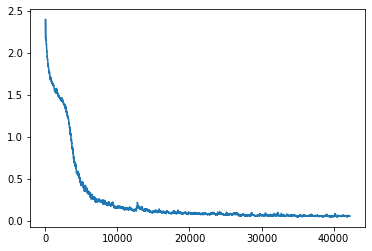

In [65]:
pd.Series(losses).ewm(100).mean().plot();

In [70]:
model.eval();

In [73]:
pd.options.display.max_colwidth = 300

In [92]:
row = df_orig_dev.sample(1).iloc[0]
row

trash                    Һаумы, нәсәлник! тип татлы йылмайып, ишек төбөндә туҡтап ҡалды ул. Был ваҡытһыҙ йөрөгән ялағайҙы күргәс, старшинаның да, урядниктың да кәйефе боҙолоп ҡуйҙы.
clean                  Һаумы, нәсәлник! - тип татлы йылмайып, ишек төбөндә туҡтап ҡалды ул. Был ваҡытһыҙ йөрөгән ялағайҙы күргәс, старшинаның да, урядниктың да кәйефе боҙолоп ҡуйҙы.
trash2                   Һаумы, нәсәлник! тип татлы йылмайып, ишек төбөндә туҡтап ҡалды ул. Был ваҡытһыҙ йөрөгән ялағайҙы күргәс, старшинаның да, урядниктың да кәйефе боҙолоп ҡуйҙы.
clean2                 Һаумы, нәсәлник! - тип татлы йылмайып, ишек төбөндә туҡтап ҡалды ул. Был ваҡытһыҙ йөрөгән ялағайҙы күргәс, старшинаның да, урядниктың да кәйефе боҙолоп ҡуйҙы.
distance                                                                                                                                                                            2
normalized_distance                                                                       

In [93]:
import textdistance

In [265]:
def fix(text, num_beams=1, max_length='auto', min_length='auto', **kwargs):
    out = tokenizer(text, padding=True, return_tensors='pt').to(model.device)
    n = out.input_ids.shape[1]
    if max_length == 'auto':
        max_length = int(n * 1.02 + 4)
    if min_length == 'auto':
        min_length = max(1, int(n * 0.98 - 4))
    preds = model.generate(**out,num_beams=num_beams, max_length=max_length, min_length=min_length, **kwargs)
    result = tokenizer.decode(preds[0], skip_special_tokens=True)
    return result

In [266]:
result = fix(row.trash2)
result

'Һаумы, нәсәлник! тип татлы йылмайып, ишек төбөндә туҡтап ҡалды ул. Был ваҡытһыҙ йөрөгән ялағайҙы күргәс, старшинаның да, урядниктың да кәйефе боҙолоп ҡуйҙы.'

In [100]:
print(textdistance.levenshtein.distance(row.trash2, row.clean2))
print(textdistance.levenshtein.distance(result, row.clean2))
print(textdistance.levenshtein.distance(row.trash2, result))

2
0
2


In [102]:
dev_small = df_orig_dev.sample(100, random_state=1).copy()

In [103]:
dev_small['fixed'] = [fix(text) for text in tqdm(dev_small.trash2)]

  0%|          | 0/100 [00:00<?, ?it/s]

In [126]:
dev_small['fixed2'] = [fix(text, num_beams=2) for text in tqdm(dev_small.trash2)]

  0%|          | 0/100 [00:00<?, ?it/s]

In [127]:
dev_small['fixed5'] = [fix(text, num_beams=5) for text in tqdm(dev_small.trash2)]

  0%|          | 0/100 [00:00<?, ?it/s]

in fact, there is no difference between beam of 2 and 5, but 2 is better than 1

In [136]:
dev_small['change_amount'] = dev_small.apply(lambda row: textdistance.levenshtein.distance(row.trash2, row.fixed5), axis=1)
dev_small['new_diff'] = dev_small.apply(lambda row: textdistance.levenshtein.distance(row.clean2, row.fixed5), axis=1)

In [137]:
dev_small.mean()

distance               1.2900
normalized_distance    0.0175
edit_max_cldiff        0.4600
edit_max_lendiff       0.0300
change_amount          8.9100
new_diff               8.9200
dtype: float64

In [138]:
tmp = dev_small.groupby('change_amount').mean()
tmp['profit'] = tmp.distance - tmp.new_diff
tmp['reduction'] = 1 - tmp.new_diff / tmp.distance 
tmp

,distance,normalized_distance,edit_max_cldiff,edit_max_lendiff,new_diff,profit,reduction
change_amount,,,,,,,
0,0.957447,0.010676,0.404255,0.021277,0.957447,0.000000,0.000000
1,1.290323,0.021056,0.612903,0.032258,0.387097,0.903226,0.700000
2,2.142857,0.038588,0.428571,0.142857,0.428571,1.714286,0.800000
3,3.000000,0.044604,0.250000,0.000000,1.500000,1.500000,0.500000
4,3.000000,0.037050,0.000000,0.000000,1.000000,2.000000,0.666667
7,0.000000,0.000000,0.000000,0.000000,7.000000,-7.000000,-inf
15,0.000000,0.000000,0.000000,0.000000,15.000000,-15.000000,-inf
25,1.000000,0.018182,1.000000,0.000000,25.000000,-24.000000,-24.000000
53,6.000000,0.029703,0.000000,0.000000,48.000000,-42.000000,-7.000000


In [139]:
dev_small.distance.sum()

129

In [140]:
cnd = dev_small.new_diff * (dev_small.change_amount < 5) + dev_small.distance * (dev_small.change_amount >= 5)
cnd.sum()

79

In [153]:
1 - cnd.sum() / dev_small.distance.sum()

0.3875968992248062

In [142]:
dev_small[dev_small['change_amount'] < 5].mean()

distance               1.296703
normalized_distance    0.018430
edit_max_cldiff        0.461538
edit_max_lendiff       0.032967
change_amount          0.714286
new_diff               0.747253
dtype: float64

In [143]:
dev_small[dev_small.change_amount > 5]

,trash,clean,trash2,clean2,distance,normalized_distance,split,edit_max_cldiff,edit_max_lendiff,fixed,change_amount,new_diff,fixed2,fixed5
13906,"Яҡшы, көр аттар ослап егеүле кырандаста йәйелеп ултырған мыйыҡһыҙ, түңәрәк ҡара һаҡаллы, оҙонсай маңлайлы кеше: - һай, оҫта тартаһың ҡурайҙы, һоҡланып бөтөрлөк түгел,- тип маҡтаны ла, сәнскеле күҙҙәре менән туп-тура ҡарап, һораны: - Ҡайһы яҡ егете һин?","Яҡшы, көр аттар ослап егеүле кырандаста йәйелеп ултырған мыйыҡһыҙ, түңәрәк ҡара һаҡаллы, оҙонсай маңлайлы кеше: - Һай, оҫта тартаһың ҡурайҙы, һоҡланып бөтөрлөк түгел, - тип маҡтаны ла, сәнскеле күҙҙәре менән туп-тура ҡарап, һораны: - Ҡайһы яҡ егете һин?","Яҡшы, көр аттар ослап егеүле кырандаста йәйелеп ултырған мыйыҡһыҙ, түңәрәк ҡара һаҡаллы, оҙонсай маңлайлы кеше: - һай, оҫта тартаһың ҡурайҙы, һоҡланып бөтөрлөк түгел,- тип маҡтаны ла, сәнскеле күҙҙәре менән туп-тура ҡарап, һораны: - Ҡайһы яҡ егете һин?","Яҡшы, көр аттар ослап егеүле кырандаста йәйелеп ултырған мыйыҡһыҙ, түңәрәк ҡара һаҡаллы, оҙонсай маңлайлы кеше: - Һай, оҫта тартаһың ҡурайҙы, һоҡланып бөтөрлөк түгел, - тип маҡтаны ла, сәнскеле күҙҙәре менән туп-тура ҡарап, һораны: - Ҡайһы яҡ егете һин?",2,0.007905,dev,1,0,"Яҡшы, көр аттар ослап егеүле кырандаста йәйелеп ултырған мыйыҡһыҙ, түңәрәк ҡара һаҡаллы, оҙонсай маңлайлы кеше: - Ҡайһы яҡ егете һин?",119,120,"Яҡшы, көр аттар ослап егеүле кырандаста йәйелеп ултырған мыйыҡһыҙ, түңәрәк ҡара һаҡаллы, оҙонсай маңлайлы кеше: - Ҡайһы яҡ егете һин?","Яҡшы, көр аттар ослап егеүле кырандаста йәйелеп ултырған мыйыҡһыҙ, түңәрәк ҡара һаҡаллы, оҙонсай маңлайлы кеше: - Ҡайһы яҡ егете һин?"
14200,"Ул тауҙарҙан сылтырап төшөп, унда күргәндәрен өлкән апалары Ағиҙелгә һөйләргә ашығыусы шишмәләр менән -1. . йылғасыҡтар тиһеңме, ул мең төрлө сәскәләр менән ат бауырын ҡытыҡлаусы йомшаҡ үләндәр тиһеңме!","Ул тауҙарҙан сылтырап төшөп, унда күргәндәрен өлкән апалары Ағиҙелгә һөйләргә ашығыусы шишмәләр менән йылғасыҡтар тиһеңме, ул мең төрлө сәскәләр менән ат бауырын ҡытыҡлаусы йомшаҡ үләндәр тиһеңме!","Ул тауҙарҙан сылтырап төшөп, унда күргәндәрен өлкән апалары Ағиҙелгә һөйләргә ашығыусы шишмәләр менән -1. . йылғасыҡтар тиһеңме, ул мең төрлө сәскәләр менән ат бауырын ҡытыҡлаусы йомшаҡ үләндәр тиһеңме!","Ул тауҙарҙан сылтырап төшөп, унда күргәндәрен өлкән апалары Ағиҙелгә һөйләргә ашығыусы шишмәләр менән йылғасыҡтар тиһеңме, ул мең төрлө сәскәләр менән ат бауырын ҡытыҡлаусы йомшаҡ үләндәр тиһеңме!",6,0.029703,dev,0,0,"Ул тауҙарҙан сылтырап төшөп, унда күргәндәрен өлкән апалары Ағиҙелгә һөйләргә ашығыусы шишмәләр менән - ат бауырын ҡытыҡлаусы йомшаҡ үләндәр тиһеңме!",53,48,"Ул тауҙарҙан сылтырап төшөп, унда күргәндәрен өлкән апалары Ағиҙелгә һөйләргә ашығыусы шишмәләр менән - ат бауырын ҡытыҡлаусы йомшаҡ үләндәр тиһеңме!","Ул тауҙарҙан сылтырап төшөп, унда күргәндәрен өлкән апалары Ағиҙелгә һөйләргә ашығыусы шишмәләр менән - ат бауырын ҡытыҡлаусы йомшаҡ үләндәр тиһеңме!"
12319,"Алдашып, кемделер бәләнән ҡурсалап ҡала ине. ...Ә шулай ҙа йәшерәк сағында бер мәл уны шайтан ҡоторта яҙып, ҡоторта яҙып ҡалды.","Алдашып, кемделер бәләнән ҡурсалап ҡала ине. ...Ә шулай ҙа йәшерәк сағында бер мәл уны шайтан ҡоторта яҙып, ҡоторта яҙып ҡалды.","Алдашып, кемделер бәләнән ҡурсалап ҡала ине. ...Ә шулай ҙа йәшерәк сағында бер мәл уны шайтан ҡоторта яҙып, ҡоторта яҙып ҡалды.","Алдашып, кемделер бәләнән ҡурсалап ҡала ине. ...Ә шулай ҙа йәшерәк сағында бер мәл уны шайтан ҡоторта яҙып, ҡоторта яҙып ҡалды.",0,0.000000,dev,0,0,"Алдашып, кемделер бәләнән ҡурсалап ҡала ине....Ә шулай ҙа йәшерәк сағында бер мәл уны шайтан ҡоторта яҙып, ҡоторта яҙып, ҡоторта яҙып, ҡоторта яҙып, ҡоторта яҙып, ҡоторта яҙып, ҡоторта яҙып, ҡоторта яҙып, ҡоторта яҙып, ҡоторта яҙып, ҡоторта яҙып, ҡоторта яҙып, ҡоторта яҙып, ҡоторта яҙып, ҡоторта...",15,15,"Алдашып, кемделер бәләнән ҡурсалап ҡала ине....Ә шулай ҙа йәшерәк сағында бер мәл уны шайтан ҡоторта яҙып, ҡоторта яҙып, ҡоторта яҙып, ҡоторта яҙып, ҡоторта яҙып ҡалды.","Алдашып, кемделер бәләнән ҡурсалап ҡала ине....Ә шулай ҙа йәшерәк сағында бер м

In [154]:
path = '../models/t5-tiny-denoise-v1'

In [155]:
model.save_pretrained(path)
tokenizer.save_pretrained(path)

('../models/t5-tiny-denoise-v1\\tokenizer_config.json',
 '../models/t5-tiny-denoise-v1\\special_tokens_map.json',
 '../models/t5-tiny-denoise-v1\\added_tokens.json')

# Now try adding synthetic noise to the clean training data

In [243]:
import json
import random

def findall(haystack, needle):
    first_ids = []
    i = haystack.find(needle)
    while i != -1:
        first_ids.append(i)
        i = haystack.find(needle, i+1)
    return first_ids


class Noiser():
    def __init__(self, deletions_cnt=None, new2olds=None, edit_total_proba=None, char_prior=None):
        self.deletions_cnt = deletions_cnt
        self.new2olds = new2olds
        self.edit_total_proba = edit_total_proba
        self.char_prior = char_prior
    
    def save(self, path):
        with open(path, 'w') as f:
            json.dump(
                {
                    'deletions_cnt': self.deletions_cnt, 
                    'new2olds': self.new2olds, 
                    'edit_total_proba': self.edit_total_proba, 
                    'char_prior': self.char_prior,
                }, 
                f, 
                ensure_ascii=False, indent=1
            )
    
    @classmethod
    def load(cls, path):
        with open(path, 'r') as f:
            data = json.load(f)
        return cls(
            deletions_cnt=data['deletions_cnt'],
            new2olds=data['new2olds'],
            edit_total_proba=data['edit_total_proba'],
            char_prior=data['char_prior'],
        )
    
    def add_noise(
        self, text, min_edits=1, max_edits=10, p_exit=None, p_insert=0.18, temp=0.3, p_randchar=0.05, edit_rate=0.02,
        eps=1e-10,
    ):
        # todo: smooth all probabilities
        if p_exit is None:
            p_exit = 1 / (max(2, len(text)) * edit_rate)
        # replacing a random character (including deletions)
        candidates = [text[i:i+n] for n in range(1, 4) for i in range(len(text)-n+1)]
        cand_weights = [self.edit_total_proba.get(c, 0) ** temp + eps for c in candidates]
        n_edits = 0
        for i in range(max_edits):
            if random.random() < p_randchar:
                rep = random.choices(
                    list(self.char_prior.keys()), weights=[c + eps for c in self.char_prior.values()]
                )[0]
                idx = random.randint(0, len(text)-1)
                text = text[:idx] + rep + text[idx + 1:]
            elif random.random() < p_insert:
                idx = random.randint(0, len(text))
                insertion = random.choices(
                    list(self.deletions_cnt.keys()), 
                    weights=[c + eps for c in self.deletions_cnt.values()]
                )[0]
                text = text[:idx] + insertion +  text[idx:]
                n_edits += 1
            else:
                choice = random.choices(candidates, weights=cand_weights)[0]
                if choice not in text:
                    continue
                idx = random.choice(findall(text, choice))
                rd = self.new2olds.get(choice, self.char_prior)
                replacement = random.choices(
                    list(rd.keys()), 
                    weights=[c + eps for c in rd.values()]
                )[0]
                text = text[:idx] + replacement +  text[idx + len(choice):]
                n_edits += 1
            if n_edits >= min_edits and random.random() < p_exit:
                break
        return text

In [244]:
noiser = Noiser.load('noise_model_v1.json')

In [190]:
text = random.choice(clean_sents)

In [272]:
print(text)
print(noiser.add_noise(text, edit_rate=0.05))

Тәбиғәтте һаҡлау буйынса сараларҙа ҡатнашыусыларҙың йылдан-йыл артыуы ла шатландырмай ҡалмай.
Тәбиғәтте һаҡлау буйынса сараларҙа ҡстнашыусыларҙың йылдан-йыл артыуы ла шатләнән әрмай ҡд д май.


In [221]:
optimizer = torch.optim.Adam(model.parameters(), lr=1e-5)
cleanup()

In [231]:
share_real = 0.1
p_keep = 0.5
grad_steps = 8
report_steps = 1000
bs = 1

In [232]:
losses = []

In [246]:
model.train()

for i in trange(1_000_000):
    if random.random() < share_real:
        batch = df_train.sample(bs)
        xx, yy = batch.trash2.tolist(), batch.clean2.tolist()
    else:
        xx = random.sample(clean_sents, bs)
        yy = [noiser.add_noise(text, edit_rate=0.05) if random.random() < p_keep else text for text in xx]
    
    try:
        x = tokenizer(xx, padding=True, return_tensors='pt').to(model.device)
        y = tokenizer(yy, padding=True, return_tensors='pt').to(model.device)

        y.input_ids[y.input_ids == 0] = -100
        loss = model(
            input_ids=x.input_ids,
            attention_mask=x.attention_mask,
            labels=y.input_ids,
            decoder_attention_mask=y.attention_mask,
            return_dict=True
        ).loss
        loss.backward()
        if i % grad_steps == 0:
            optimizer.step()
            optimizer.zero_grad()
        losses.append(loss.item())
    except RuntimeError as e:
        loss = None
        optimizer.zero_grad()
        cleanup()
        print('error', i, e)
        
    if i % report_steps == 0:
        print('step', i, 'loss', np.mean(losses[-report_steps:]))

  0%|          | 0/1000000 [00:00<?, ?it/s]

step 0 loss 0.1472825689483434
step 1000 loss 0.14194738892652095
step 2000 loss 0.1323908112803474
error 2754 CUDA out of memory. Tried to allocate 88.00 MiB (GPU 0; 4.00 GiB total capacity; 2.51 GiB already allocated; 6.20 MiB free; 2.64 GiB reserved in total by PyTorch) If reserved memory is >> allocated memory try setting max_split_size_mb to avoid fragmentation.  See documentation for Memory Management and PYTORCH_CUDA_ALLOC_CONF
step 3000 loss 0.148925592886284
step 4000 loss 0.13794131877133622
error 4802 CUDA out of memory. Tried to allocate 218.00 MiB (GPU 0; 4.00 GiB total capacity; 2.31 GiB already allocated; 128.20 MiB free; 2.52 GiB reserved in total by PyTorch) If reserved memory is >> allocated memory try setting max_split_size_mb to avoid fragmentation.  See documentation for Memory Management and PYTORCH_CUDA_ALLOC_CONF
step 5000 loss 0.14397644076682628
step 6000 loss 0.1426956572830677
step 7000 loss 0.14415900671854615
step 8000 loss 0.141122937197797
step 9000 loss

step 68000 loss 0.13015899854991586
step 69000 loss 0.14279593732859938
step 70000 loss 0.14579197085415946
step 71000 loss 0.13612105597741903
step 72000 loss 0.1312505107978359
step 73000 loss 0.1382298058597371
step 74000 loss 0.13328957142867148
step 75000 loss 0.1402048734482378
step 76000 loss 0.12217005340848118
step 77000 loss 0.1405895093381405
step 78000 loss 0.12890467978268863
step 79000 loss 0.13041056259814648
step 80000 loss 0.14282028002664446
step 81000 loss 0.13665017681475727
step 82000 loss 0.12154696011450142
step 83000 loss 0.1329771571904421
step 84000 loss 0.13211077723139897
step 85000 loss 0.13998162765055894
step 86000 loss 0.13383974360488354
error 86992 CUDA out of memory. Tried to allocate 534.00 MiB (GPU 0; 4.00 GiB total capacity; 2.34 GiB already allocated; 252.20 MiB free; 2.40 GiB reserved in total by PyTorch) If reserved memory is >> allocated memory try setting max_split_size_mb to avoid fragmentation.  See documentation for Memory Management and PY

step 153000 loss 0.1241980385221541
step 154000 loss 0.12694220704399048
step 155000 loss 0.12535653560236096
step 156000 loss 0.13689898052439092
error 156437 CUDA out of memory. Tried to allocate 126.00 MiB (GPU 0; 4.00 GiB total capacity; 2.54 GiB already allocated; 24.20 MiB free; 2.62 GiB reserved in total by PyTorch) If reserved memory is >> allocated memory try setting max_split_size_mb to avoid fragmentation.  See documentation for Memory Management and PYTORCH_CUDA_ALLOC_CONF
step 157000 loss 0.1370439844429493
error 157060 CUDA out of memory. Tried to allocate 576.00 MiB (GPU 0; 4.00 GiB total capacity; 2.50 GiB already allocated; 106.20 MiB free; 2.54 GiB reserved in total by PyTorch) If reserved memory is >> allocated memory try setting max_split_size_mb to avoid fragmentation.  See documentation for Memory Management and PYTORCH_CUDA_ALLOC_CONF
step 158000 loss 0.13235423298738896
error 158459 CUDA out of memory. Tried to allocate 384.00 MiB (GPU 0; 4.00 GiB total capacity

step 223000 loss 0.1312027073018253


KeyError: '00'

In [247]:
model.eval();

In [267]:
dev_small['fixed2'] = [fix(text, num_beams=2) for text in tqdm(dev_small.trash2)]

  0%|          | 0/100 [00:00<?, ?it/s]

In [268]:
dev_small['change_amount'] = dev_small.apply(lambda row: textdistance.levenshtein.distance(row.trash2, row.fixed2), axis=1)
dev_small['new_diff'] = dev_small.apply(lambda row: textdistance.levenshtein.distance(row.clean2, row.fixed2), axis=1)

dev_small.mean()

distance               1.2900
normalized_distance    0.0175
edit_max_cldiff        0.4600
edit_max_lendiff       0.0300
change_amount          0.5900
new_diff               1.3800
dtype: float64

In [269]:
cnd = dev_small.new_diff * (dev_small.change_amount < 5) + dev_small.distance * (dev_small.change_amount >= 5)
print(cnd.sum())
print(1 - cnd.sum() / dev_small.distance.sum())

106
0.17829457364341084
